# **PrakritiSense: Green House Gases Emission Prediction**
## **WEEK 1**
### **By-Ayush Upadhyay**





Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

Step 2: Load Dataset

In [2]:
excel_file = r"C:\Users\ayush\Downloads\SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx"

In [3]:
years = list(range(2010, 2017))

In [6]:

print("Year at index 4:", years[4])

Year at index 4: 2014


In [7]:
years[2]

2012

In [14]:
import pandas as pd

# Assuming the file was uploaded and its name is in the 'uploaded' dictionary
# You can access the filename using list(uploaded.keys())[0] if only one file was uploaded
excel_file_name = list(uploaded.keys())[0]

df_1 = pd.read_excel(excel_file_name, sheet_name = f'{years[4]}_Detail_Commodity')
print("Loaded commodity data for:", years[3])
display(df_1.head())

Loaded commodity data for: 2013


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.355,0.064,0.419,NaN,4,2,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,2,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.003,0.000,0.003,NaN,3,2,1,4,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.616,0.071,0.687,NaN,4,2,1,4,1


In [16]:
df_2 = pd.read_excel(excel_file_name, sheet_name = f'{years[4]}_Detail_Industry')
print("Loaded industry data for:", years[3])
display(df_2.head())

Loaded industry data for: 2013


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.368,0.064,0.432,NaN,4,2,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,2,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.003,0.000,0.003,NaN,3,2,1,4,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.633,0.071,0.704,NaN,4,2,1,4,1


In [18]:
all_data = []

for year in years:
    try:
        # Load both sheets for the year
        df_com = pd.read_excel(excel_file_name, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file_name, sheet_name=f'{year}_Detail_Industry')

        # Add metadata
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        # Clean column names (remove trailing/leading spaces)
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        # Rename common fields to unify format
        df_com.rename(columns={'Commodity Code': 'Code', 'Commodity Name': 'Name'}, inplace=True)
        df_ind.rename(columns={'Industry Code': 'Code', 'Industry Name': 'Name'}, inplace=True)


        # Combine both and add to master list
        combined = pd.concat([df_com, df_ind], ignore_index=True)
        all_data.append(combined)

    except Exception as e:
        print(f" Error processing year {year}: {e}")

In [19]:
all_data[2]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.438,0.068,0.506,NaN,4,3,1,4,1,Commodity,2012
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2012
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2012
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2012
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.693,0.076,0.769,NaN,4,3,1,4,1,Commodity,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.007,0.000,0.007,NaN,4,3,1,5,1,Industry,2012
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2012
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2012
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2012


In [20]:
all_data[3].head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013


In [21]:
len(all_data)

7

In [22]:
# Merge all years into a single DataFrame
df = pd.concat(all_data, ignore_index=True)

# Preview
print(f" Final combined dataset shape: {df.shape}")
df.head(8)

 Final combined dataset shape: (22092, 15)


,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010
5,1111B0,"Fresh wheat, corn, rice, and other grains",methane,"kg/2018 USD, purchaser price",0.008,0.001,0.009,NaN,2,3,1,1,1,Commodity,2010
6,1111B0,"Fresh wheat, corn, rice, and other grains",nitrous oxide,"kg/2018 USD, purchaser price",0.004,0.000,0.004,NaN,4,3,1,4,1,Commodity,2010
7,1111B0,"Fresh wheat, corn, rice, and other grains",other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,3,1,3,1,Commodity,2010


In [23]:
len(df)

22092

In [24]:
len(df.columns)

15

Step 3: Data Preprocessing And Visualization

In [25]:
# 1. Show column names
print("Column names:")
print(df.columns.tolist())

# 2. Check shape (rows, columns)
print(f"\n Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

Column names:
['Code', 'Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins', 'Source', 'Year']

 Dataset shape: 22092 rows × 15 columns


In [26]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [27]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Code                                                          0
Name                                                          0
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7                                                22092
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
dtype: int64

In [28]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Code                                                       object
Name                                                       object
Substance                                                  object
Unit                                                       object
Supply Chain Emission Factors without Margins             float64
Margins of Supply Chain Emission Factors                  float64
Supply Chain Emission Factors with Margins                float64
Unnamed: 7                                                float64
DQ ReliabilityScore of Factors without Margins              int64
DQ TemporalCorrelation of Factors without Margins           int64
DQ GeographicalCorrelation of Factors without Margins       int64
DQ TechnologicalCorrelation of Factors without Margins      int64
DQ DataCollection of Factors without Margins                int64
Source                                                     object
Year                                            

In [29]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
df.drop(columns=['Unnamed: 7'],inplace=True)

In [30]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [32]:
df.describe().T # Checking summary statistics

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [33]:
df.isnull().sum() # Checking for null values in each column

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0
DQ GeographicalCorrelation of Factors without Margins,0


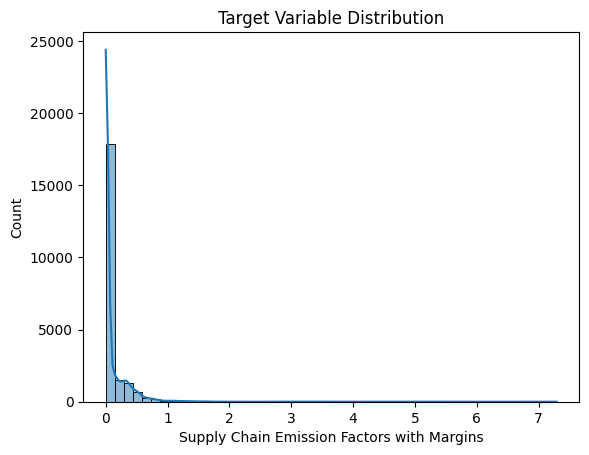

In [34]:
# Visualize distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

In [35]:
# Check categorical variables
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [36]:
print(df['Unit'].value_counts()) # Checking unique values in 'Unit' with count

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [37]:
print(df['Unit'].unique()) # Checking unique values in 'Unit'

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [38]:
print(df['Source'].value_counts()) # Checking unique values in 'Source' with count

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [39]:
df['Substance'].unique() # Checking unique values in 'Substance'

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [40]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3} # Mapping substances to integers

In [41]:
df['Substance']=df['Substance'].map(substance_map)

In [42]:
df['Substance'].unique() # Checking unique values in 'Substance'

array([0, 1, 2, 3])

In [43]:
print(df['Unit'].unique()) # Checking unique values in 'Unit'

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


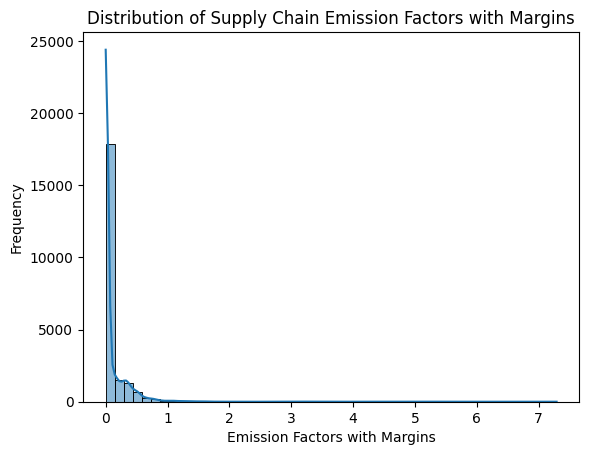

In [44]:
# Visualize the distribution of the target variable
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Distribution of Supply Chain Emission Factors with Margins')
plt.xlabel('Emission Factors with Margins')
plt.ylabel('Frequency')
plt.show()

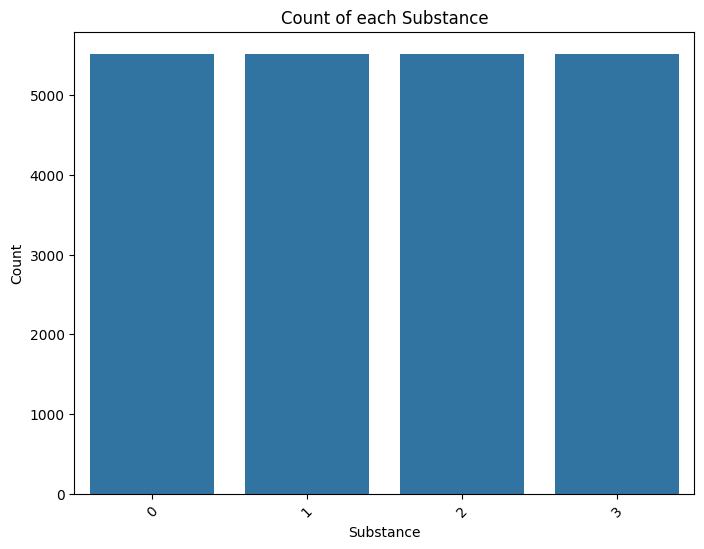

In [45]:
# Visualize the count of each substance
plt.figure(figsize=(8, 6))
sns.countplot(x='Substance', data=df)
plt.title('Count of each Substance')
plt.xlabel('Substance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

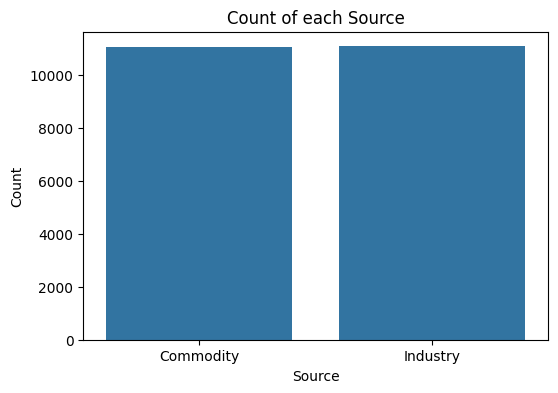

In [46]:
# Visualize the count of each source
plt.figure(figsize=(6, 4))
sns.countplot(x='Source', data=df)
plt.title('Count of each Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()